In [44]:
# importing the libraries
import numpy as np
import peakutils
import syntheticdata

import threegaussians

from peakutils.plot import plot as pplot
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import interpolate

import pandas as pd
from pyearth import Earth

In [2]:
# load some data
def loaddata(data_filename):
    """load matrix data"""
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[1:,0]    #wavelength in nm
    data_time = data[0,1:]
    data_z = data[1:, 1:]

    return data_nm, data_time, data_z

In [3]:
# add noise
def add_noise(nm_array, y_array, noise_coefficient):
    # Add noise
    np.random.seed(1800)
    y_noise = noise_coefficient * np.random.normal(size=nm_array.size)
    y_proc = y_array + y_noise
    
    return y_proc

In [4]:
def Earth_Smoothing(nm_array, y_array,noise_coefficient):        
    """
    ============================================
     Plotting derivatives of simple sine function
    ============================================

     A simple example plotting a fit of the sine function
    and the derivatives computed by Earth.
    
    Notes
    -----   
    generates a denoise curve from the TA data
    Parameters
    ----------
        nm_array: wavelength array
        timedelay: time delay array
        noise_coefficient: the noise coefficients that user want to generate
    Returns
    -------
        a smoothing curve from the original noise curve   
    """
    
   # Fit an Earth model
    model = Earth(smooth=True)
    np.random.seed(42)
    ydata = y_array + noise_coefficient*np.random.normal(size=nm_array.size)
    model.fit(nm_array, ydata)

   # Print the model
    #print(model.trace())
    #print(model.summary())

   # Get the predicted values and derivatives
    y_hat = model.predict(nm_array)
    
    return  y_hat

In [5]:
def earth_smooth_matrix(nm_array,data_matrix,noise_coefficient):
    num_array = np.shape(data_matrix)[0]
    
    smooth_matx = pd.DataFrame(np.empty((num_array,1)), columns = ['a'])
    noise_matx = pd.DataFrame(np.empty((num_array,1)), columns = ['a'])
    
    for i in range(num_array):
        data_array = data_matrix[:, i]
        
        # get noise and smooth list
        noise_array = add_noise(nm_array, data_array, noise_coefficient).tolist()
        smooth_array =earth_Smoothing(nm_array,data_array,noise_coefficient).tolist()
        
        # get noise dataframe
        DF = pd.DataFrame(noise_array,columns = [i])
        noise_matx = noise_matx.join(DF)
        
        # get smooth dataframe
        df = pd.DataFrame(smooth_array,columns = [i])
        smooth_matx = smooth_matx.join(df)
        
    # drop the first columns  
    noise_matx = noise_matx.drop(columns='a')
    smooth_matx = smooth_matx.drop(columns='a')
        
    return noise_matx, smooth_matx

In [6]:
def findpeak(data_z_array, threshold, min_dist):
    """find peaks and return indices of the peaks"""    
    peak_indices = peakutils.indexes(data_z_array, thres=threshold, min_dist=min_dist)
    
    return peak_indices

In [7]:
def earth_peak_matrix(nm_array,data_matrix,noise_coefficient,threshold, min_dist):
    num_array = np.shape(data_matrix)[1]
    
    true_peak = []
    smooth_peak = []
    
    for i in range(num_array):
        data_array = data_matrix[:, i]
        noise_array = add_noise(nm_array, data_array, noise_coefficient)
        smooth_array = Earth_Smoothing(nm_array, data_array,noise_coefficient)
        
        indexes=findpeak(data_array, threshold, min_dist).tolist()
        true_peak.append(indexes)
        
        indexes1=findpeak(smooth_array, threshold, min_dist).tolist()
        smooth_peak.append(indexes1)
                
        # transfer to dataframe
        true_df=pd.DataFrame(true_peak)
        smooth_df=pd.DataFrame(smooth_peak)
    
    return true_df, smooth_df

# Get peak info in a dataframe #

* py-earth to smoothening and peakutils to find peaks

In [8]:
matx_filename = '20180418_twogaussian_spectralshfit.txt'
datanm, datatime, dataz_matx = loaddata(matx_filename)
## get the peak position dataframe of true data set
true_df, smooth_df = earth_peak_matrix(datanm, dataz_matx, 0.1, 0, 10)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [9]:
true_df

,0,1
0,50,400
1,50,400
2,50,400
3,50,400
4,51,400
5,51,400
6,51,400
7,51,400
8,52,400
9,52,400


In [10]:
smooth_df

,0,1,2
0,50,402.0,NaN
1,53,393.0,NaN
2,54,393.0,NaN
3,54,394.0,NaN
4,53,198.0,392.0
5,55,389.0,NaN
6,55,389.0,NaN
7,54,389.0,NaN
8,54,389.0,NaN
9,55,213.0,389.0


In [13]:
peak_smooth_matx = np.array(smooth_df)

In [14]:
np.shape(peak_smooth_matx)

(500, 3)

In [15]:
peak_smooth_matx_corr = np.nan_to_num(peak_smooth_matx)
peak_smooth_matx_corr

array([[ 50., 402.,   0.],
       [ 53., 393.,   0.],
       [ 54., 393.,   0.],
       ...,
       [133.,   0.,   0.],
       [133.,   0.,   0.],
       [134.,   0.,   0.]])

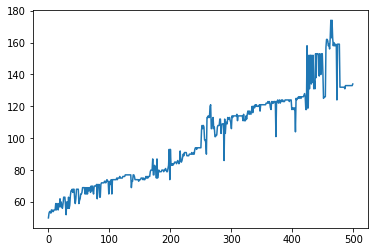

In [16]:
plt.figure()
plt.plot(datatime, peak_smooth_matx_corr[:, 0])

## Try force a continuous 1st and 2nd derivative via spline interpolation ##

In [17]:
from scipy.interpolate import splev, splrep

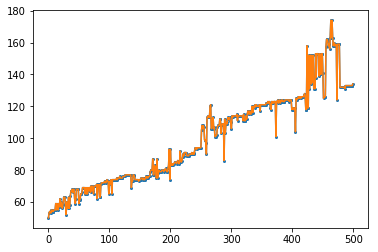

In [24]:
peak_pos = peak_smooth_matx_corr[:, 0]
peak_pos_splrep = splrep(datatime, peak_pos)
peak_pos_splev = splev(datatime, peak_pos_splrep)

plt.figure
plt.plot(datatime, peak_pos, '-o', markersize = 2, label = 'output from peakfinding')
plt.plot(datatime, peak_pos_splev, label = 'spline interpolation')


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn import linear_model

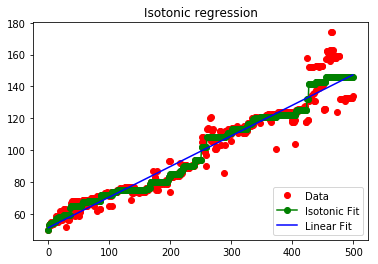

In [27]:
x = datatime
y = peak_pos

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result



fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')

plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

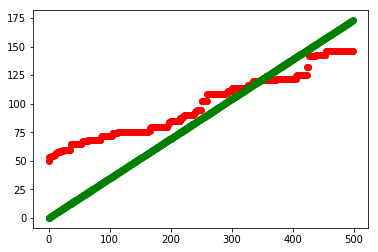

In [43]:
ridge = linear_model.Ridge(alpha=-5, fit_intercept=False)

ridge.fit(np.reshape(x, (-1, 1)), np.reshape(y_, (-1, 1)))
fig = plt.figure()
plt.plot(x, y_, 'r.', markersize=12)
plt.plot(np.reshape(x, (-1, 1))[:, 0], ridge.predict(np.reshape(x, (-1, 1))), 'g.', markersize=12)

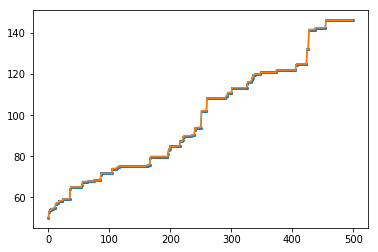

In [30]:
y_splrep = y_
peak_pos_splrep = splrep(datatime, y_splrep)
peak_pos_splev = splev(datatime, peak_pos_splrep)

plt.figure()
plt.plot(datatime, y_splrep, '-o', markersize = 2, label = 'output from peakfinding')
plt.plot(datatime, peak_pos_splev, label = 'spline interpolation')


/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


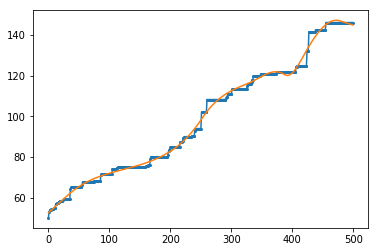

In [48]:
Earthmodel = Earth(smooth=True)

ydata = y_
Earthmodel.fit(datatime, ydata)
y_predict = Earthmodel.predict(datatime)

plt.figure()
plt.plot(datatime, y_, '-o', markersize = 2, label = 'after isotonic regression')
plt.plot(datatime, y_predict, label = 'Earth smoothen')